<h3>Read in Kaggle df</h3>

In [ ]:
import pandas as pd
path_kaggle = r'C:\Users\Desktop\MSBA Coursework\Tools for Analytics\datafile'\amazon_com_extras.csv'

with open(path_kaggle):
    #Added fields since line 808 in csv has more than 6 cols and needs to be told to ignore extra data.
    
    fields=['ASIN','GROUP','FORMAT','TITLE','AUTHOR','PUBLISHER']
    df_kaggle = pd.read_csv(path_kaggle, encoding='latin1', dtype=str,usecols=fields)

<h3> Read in amazon_com_extras. </h3>

In [ ]:
import pandas as pd
import random 
import json
from bs4 import BeautifulSoup as bs
import numpy as np
import requests
import time

my_csvfile=r'C:\Users\Desktop\MSBA Coursework\Tools for Analytics\datafile\AZscrape.csv'
start_entry=48001
end_entry=63000 

<h2> Getting book Description </h2>

In [ ]:
def get_book_description(url,user_agent_list):
    book_description=''
    book_rating=''
    book_price=''
    print(url)
    #User Agents to prevent bot detection
    user_agent = random.choice(user_agent_list)
    headers = {'User-Agent': user_agent}
    
    #Throttling to spoof the server into believe these are generated by users
    time.sleep(7)
    
    book_description_response=requests.get(url,headers=headers)
    if book_description_response.status_code!=200:
        print("Error in scraping description")
        return None
    else:
        book_page=bs(book_description_response.content,"lxml")
        a1=book_page.find('div',{'id':'a-page'})
        a2=a1.find('div',class_='book en_US').find('div',class_='a-container').find('div',{'id':'centerCol'})
        try:
            book_description=a2.find('div',{'id':'bookDescription_feature_div'}).find('noscript').find('div').get_text()
        except:
            book_description=np.NAN
        try:
            book_rating=a2.find('div',{'id':'averageCustomerReviews_feature_div'}).find('span',class_='a-declarative').find('span',{'id':'acrPopover'}).find('span',class_='a-declarative').find('a').find('i').find('span').get_text().split()[0]    
        except:
            book_rating=np.NAN
        try:
            book_price=a2.find('div',{'id':'MediaMatrix'}).find('div').find('div',{'id':'tmmSwatches'}).find('ul').find('li',class_='swatchElement selected').find('span').find('span').find('span').find('span',class_='a-color-base').find('span').get_text().strip()
        except:
            book_price=np.NAN
        return book_description,book_price,book_rating

<h3> Use ISBN 10 to scrape book descriptions</h3>
User Agent Code - Refer https://www.scrapehero.com/how-to-fake-and-rotate-user-agents-using-python-3/


In [ ]:
import requests
import numpy as np

def amazon_description(book_metadata):
    
    import random
    import time
    
    #New columns that will be added to book_metadata
    book_descriptions=list()
    book_price=list()
    book_rating=list()
    
    user_agent_list = [
           #Chrome
            'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/60.0.3112.113 Safari/537.36',
            'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/60.0.3112.90 Safari/537.36',
            'Mozilla/5.0 (Windows NT 5.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/60.0.3112.90 Safari/537.36',
            'Mozilla/5.0 (Windows NT 6.2; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/60.0.3112.90 Safari/537.36',
            'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/44.0.2403.157 Safari/537.36',
            'Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/60.0.3112.113 Safari/537.36',
            'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/57.0.2987.133 Safari/537.36',
            'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/57.0.2987.133 Safari/537.36',
            'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/55.0.2883.87 Safari/537.36',
            'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/55.0.2883.87 Safari/537.36',
            #Firefox
            'Mozilla/4.0 (compatible; MSIE 9.0; Windows NT 6.1)',
            'Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7.0; rv:11.0) like Gecko',
            'Mozilla/5.0 (compatible; MSIE 9.0; Windows NT 6.1; WOW64; Trident/5.0)',
            'Mozilla/5.0 (Windows NT 6.1; Trident/7.0; rv:11.0) like Gecko',
            'Mozilla/5.0 (Windows NT 6.2; WOW64; Trident/7.0; rv:11.0) like Gecko',
            'Mozilla/5.0 (Windows NT 10.0; WOW64; Trident/7.0; rv:11.0) like Gecko',
            'Mozilla/5.0 (compatible; MSIE 9.0; Windows NT 6.0; Trident/5.0)',
            'Mozilla/5.0 (Windows NT 6.3; WOW64; Trident/7.0; rv:11.0) like Gecko',
            'Mozilla/5.0 (compatible; MSIE 9.0; Windows NT 6.1; Trident/5.0)',
            'Mozilla/5.0 (Windows NT 6.1; Win64; x64; Trident/7.0; rv:11.0) like Gecko',
            'Mozilla/5.0 (compatible; MSIE 10.0; Windows NT 6.1; WOW64; Trident/6.0)',
            'Mozilla/5.0 (compatible; MSIE 10.0; Windows NT 6.1; Trident/6.0)',
            'Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 5.1; Trident/4.0; .NET CLR 2.0.50727; .NET CLR 3.0.4506.2152; .NET CLR 3.5.30729)'
        ]
    
    
    book_metadata['Description']=''
    book_metadata['Price']=''
    book_metadata['Rating']=''
    for i in range(len(book_metadata)):
        
        #User Agents to prevent bot detection
        user_agent=random.choice(user_agent_list)
        book_isbn=book_metadata['ASIN'].iloc[i]
        
        print(book_isbn)
        base_url = "https://www.amazon.com/s/ref=nb_sb_noss?url=search-alias%3Dstripbooks-intl-ship&field-keywords="
        url=base_url+book_isbn
        print(url)
        headers={'User-Agent':user_agent}
        book_response=requests.get(url,headers=headers)
        if book_response.status_code != 200:
            print("Getting Book Details Failed")
            return None
        else:
            result_page=bs(book_response.content,'lxml')
            all_book_a_tags=result_page.find("a",class_="a-link-normal s-access-detail-page s-color-twister-title-link a-text-normal")
            try:
                book_url=all_book_a_tags.get("href")
                description,price,rating=get_book_description(book_url,user_agent_list)
            except: 
                continue
            print(description,price,rating)
#             book_descriptions.append(description)
#             book_price.append(price)
#             book_rating.append(rating)
        book_metadata['Description'].iloc[i]=description
        book_metadata['Price'].iloc[i]=price
        book_metadata['Rating'].iloc[i]=rating
        book_metadata.to_csv(my_csvfile,encoding='utf-8') #save data after each query
#     book_metadata['Description']=book_descriptions
#     book_metadata['Price']=book_price
#     book_metadata['Rating']=book_rating
    
    return book_metadata

Df_read = df_kaggle.iloc[start_entry:end_entry+1]
df_final=amazon_description(Df_read) 

<h3> Combine in all AZscrape batches 1-7</h3>

In [ ]:
import os
import pandas as pd

path_dir = r'C:\Users\sanjayshah\MSBA Coursework\Tools for Analytics\datafile'
file_names = ['batch1.csv', 'batch2.csv', 'batch3.csv', 'batch4.csv', 'batch5.csv', 'batch6.csv', 'batch7.csv']
file_name_out = 'df_processed.csv'
path_output = os.path.join(path_dir, file_name_out)
fout = open(path_output, 'w', encoding='utf-8')

for batch in file_names:
    file_input = os.path.join(path_dir,batch)
    fin = open(file_input,'r',encoding='utf-8')
    for line in fin:
        fout.write(line)
fin.close()
fout.close()

<h3> Read in df_processed</h3>

In [10]:
import pandas as pd
patha =  'file2_lily2.csv'
with open(patha):
    df=pd.read_csv(patha)
df = df.dropna(how='any',axis=0)

<h3> convert df['Rating'] values to floats and strings to 0's</h3>

In [11]:
def ratings_to_floats(df):
    import re
    for i in df['Rating']:
        i = i.strip()
        m = bool(re.search('\D*',i)) #Non Digit representation will be more robust
        if i =='' or m==True:
            i='0.0'
        i = float(i)
    return df

<h2>convert df['Prices'] values to float</h2>

In [30]:
#INCOMPLETE FUNCTION - I've updated the correct statements

def prices_to_floats(price):
    import re
    i=price[1:]
    i=float(i)
        
    return i

df['Converted_Price']=df['Price'].apply(prices_to_floats)

<h2>Adding Word Cloud Segment</h2>


<h3>Remove the following words -</h3>
<li>Short Words</li>
<li>Redundant Words that appear in all descriptions</li>

In [13]:
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

#MIN_LENGTH and DELETE_WORDS will need to be updated once we identify the concerned words.

MIN_LENGTH=5
DELETE_WORDS=['life','book','world']

def remove_words(text_string,DELETE_WORDS=DELETE_WORDS):
    for word in DELETE_WORDS:
        text_string = text_string.replace(word,' ')
    return text_string


def remove_short_words(text_string,min_length = MIN_LENGTH):
    word_list = text_string.split()
    for word in word_list:
        if len(word) < min_length:
            text_string = text_string.replace(' '+word+' ',' ',1)
    return text_string



## Categorize data
We're trying to group data into the following buckets based on the rating the book has been assigned
Group 1 : Ratings 5 - 4.5
Group 2 : Ratings 4.5 - 4
Group 3 : Ratings 4 - 3.5
Group 4 : Ratings 3.5 - 3
Group 5 : Ratings 3 - 2.5
Group 0 : Irrelevant to the analysis

In [14]:
def categorize_data(df):
    
    #This list stores all the categories
    category_list=list()

    
    #Assign categories to each book
    
    for i in range(len(df)):
        if df['Rating'].iloc[i]>=4.5:
            category_list.append(1)
        elif df['Rating'].iloc[i]<4.5 and df['Rating'].iloc[i]>=4:
            category_list.append(2)
        elif df['Rating'].iloc[i]<4 and df['Rating'].iloc[i]>=3.5:
            category_list.append(3)
        elif df['Rating'].iloc[i]<3.5 and df['Rating'].iloc[i]>=3:
            category_list.append(4)
        elif df['Rating'].iloc[i]<3 and df['Rating'].iloc[i]>=2.5:
            category_list.append(5)
        else:
            category_list.append(0)

    #Add categories to the DF
    df['Category']=category_list
    
    return df

<h2>Code to aggregate text per rating</h2>

In [15]:
def aggregate_text(temp):
    x=''
    for i in range(len(temp)):
        x=x+' '+temp['Description'].iloc[i]
    return x.lower()

<h2>Control Loop</h2>

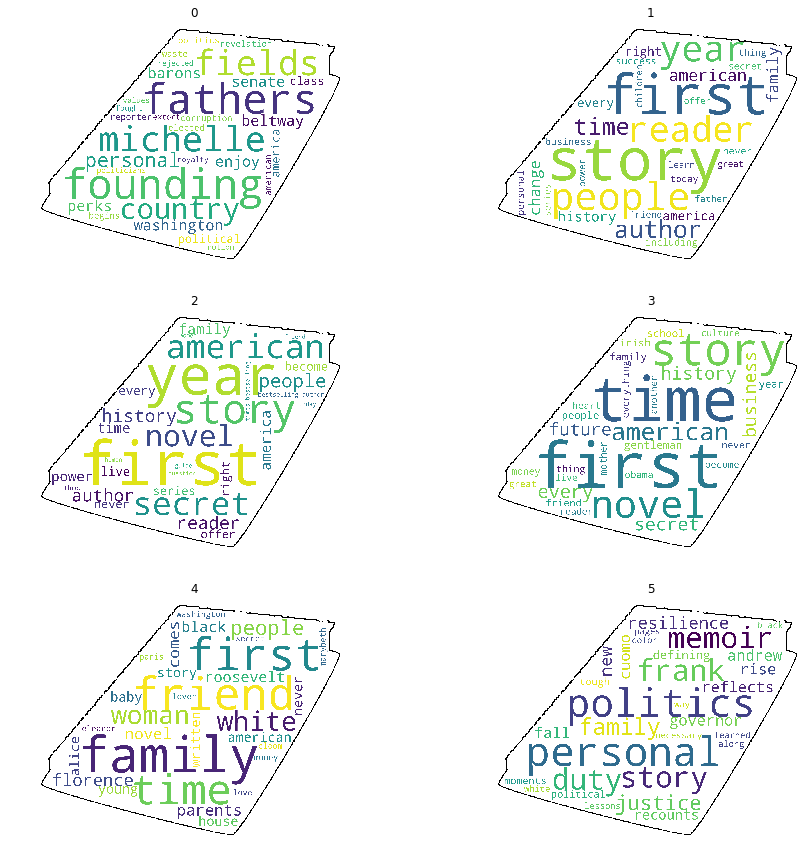

In [16]:
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS


import numpy as np
from PIL import Image

book_mask = np.array(Image.open("book.png"))

COL_NUM = 2
ROW_NUM = 3
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(15,15))



df=categorize_data(df)

#These two lists are for LSI Modeling
rating_list=list()
rating_description=list()

for i in sorted(df['Category'].unique()):
    temp=df[df['Category']==i]
    text=aggregate_text(temp)
    text=remove_words(text)
    text=remove_short_words(text)
    rating_list.append(i)
    rating_description.append(text)
    ax = axes[i//2, i%2] 
    ax.set_title(i)
    wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',width=1200,height=1000,max_words=30,contour_width=20,mask=book_mask,contour_color='black').generate(text)
    ax.imshow(wordcloud)
    ax.axis('off')
plt.show()

<h2>Chart Distribution of Rating</h2>



/Users/LovelyCheuk/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/LovelyCheuk/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


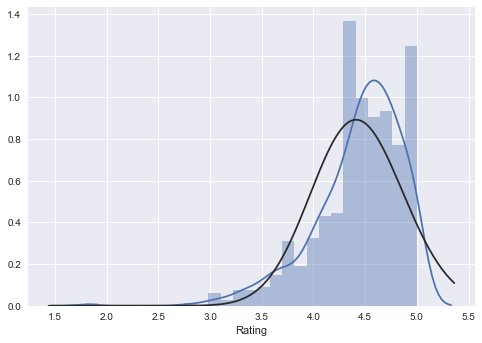

In [17]:
def chart_rating_distribution(df):
    %matplotlib inline
    import matplotlib.pyplot as plt
    import seaborn as sns
    plt.style.use('seaborn')
    from scipy import stats

    sns.distplot(df['Rating'],fit=stats.gamma)
    
chart_rating_distribution(df)

<h2>Top 15 Top and Bottom Publishers by Rating</h2>

In [18]:
import pandas as pd
    
def table_top_and_bottom_publishers_by_rating(df):
    bottom = df.groupby('PUBLISHER', as_index=False)['Rating'].mean().nsmallest(15,'Rating')
    top = df.groupby('PUBLISHER', as_index=False)['Rating'].mean().nlargest(15,'Rating')
    return top,bottom

top_publisher,bottom_publisher=table_top_and_bottom_publishers_by_rating(df)
top_publisher
#bottom_publisher

,PUBLISHER,Rating
2,Aa Publishing,5.0
6,Agate Midway,5.0
10,Allison and Busby,5.0
23,AuthorHouse,5.0
24,Ave Maria Press,5.0
33,Baylor University Press,5.0
38,Biteback,5.0
39,Blackbird Books,5.0
46,BookBaby,5.0
51,Cambridge University Press,5.0


<h2>Number of Books per Publisher (Top 15)</h2>

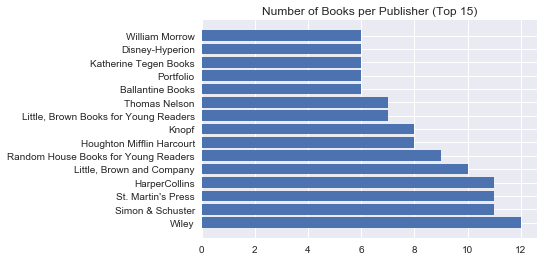

In [19]:
def num_books_per_publisher(df):
    from collections import Counter
    counts = dict(Counter(df['PUBLISHER']).most_common(15))
    pubs = list(counts.keys())
    nums = list(counts.values())

    import matplotlib.pyplot as plt 
    %matplotlib inline
    import numpy as np
    y_pos = np.arange(len(pubs))
    plt.barh(y_pos,nums)
    plt.title('Number of Books per Publisher (Top 15)')
    plt.yticks(y_pos,pubs)

    return plt.show()

num_books_per_publisher(df)

<h1>Proportion of books in each Category(as per rating)</h1>

In [23]:
!pip install plotly 
df1=df.copy()
df1=categorize_data(df1)
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

def draw_Pie(dataframe, name):
    
    
    tmp = dataframe.groupby(name).size()

    # draw histgram
    data = [go.Pie(values = tmp.values, 
               labels = tmp.index)]

    # add title
    layout = go.Layout(title = 'Pie of ' + name,
                      margin = dict(l = 80, r = 100, t = 40, b = 40))

    # draw fig
    fig = go.Figure(data = data, layout = layout)

    iplot(fig, filename = name)
    
draw_Pie(df, "Category")

    100% |████████████████████████████████| 37.8MB 1.3MB/s eta 0:00:01
  Running setup.py bdist_wheel for retrying ... done
  Stored in directory: /Users/LovelyCheuk/Library/Caches/pip/wheels/d7/a9/33/acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built retrying


<h2>Grouping into price range</h2>

In [34]:
#PRICES HAVE ALREADY BEEN CONVERTED TO FLOAT!!

def price_groups(df):
    ratinglist=[]
    for i in range(len(df)):
        if df['Converted_Price'].iloc[i]<10 and df['Converted_Price'].iloc[i]>=0:
            ratinglist.append('0-10')
        elif df['Converted_Price'].iloc[i]<20 and df['Converted_Price'].iloc[i]>=10:
            ratinglist.append('10-20')
        elif df['Converted_Price'].iloc[i]<30 and df['Converted_Price'].iloc[i]>=20:
            ratinglist.append('20-30')
        elif df['Converted_Price'].iloc[i]<40 and df['Converted_Price'].iloc[i]>=30:
            ratinglist.append('30-40')
        elif df['Converted_Price'].iloc[i]<50 and df['Converted_Price'].iloc[i]>=40:
            ratinglist.append('40-50')
        elif df['Converted_Price'].iloc[i]<60 and df['Converted_Price'].iloc[i]>=50:
            ratinglist.append('50-60')
        elif df['Converted_Price'].iloc[i]<70 and df['Converted_Price'].iloc[i]>=60:
            ratinglist.append('60-70')
        else:
            ratinglist.append('>70')
            
    df['RatingGroup']=ratinglist
    
    return df

In [32]:
type(df['Converted_Price'][0])

numpy.float64

<h2>Plotting a graph between categories and the price range count </h2>

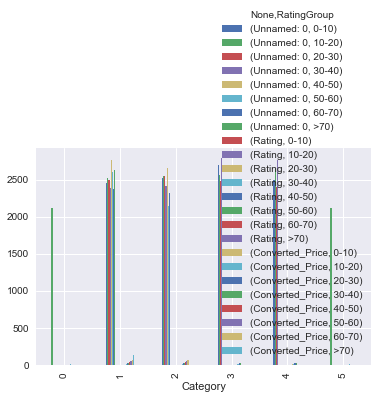

In [37]:

#df1=categorize_data(df) DATA HAS ALREADY BEEN CATEGORIZED

df1=price_groups(df)
gp = df1.groupby(['Category','RatingGroup'])
gp.mean().unstack().plot(kind='bar')


<h3>Looking at the graph, we can conclude that most books with ratings>4.5 have a price in the range $50-60</h3>

## Topic Modeling for Category 

In [39]:
def topic_categories(temp,category):
    data_text = temp[['Description']]
    data_text['index'] = data_text.index
    documents = data_text

    stemmer = SnowballStemmer('english')
    
    def lemmatize_stemming(text):
        return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
    
    def preprocess(text):
        result = []
        for token in gensim.utils.simple_preprocess(text):
            if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
                result.append(lemmatize_stemming(token))
        return result

    processed_docs = documents['Description'].map(preprocess)
    dictionary = gensim.corpora.Dictionary(processed_docs)
    dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)
    bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
    
    from gensim import corpora, models

    tfidf = models.TfidfModel(bow_corpus)
    corpus_tfidf = tfidf[bow_corpus]
    from pprint import pprint

    topics=3
    try:
        lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=topics, id2word=dictionary, passes=5, workers=2)
    except:
        return
    
    from operator import itemgetter
    
    for top in range(topics):
        draw_wordcloud(lda_model,top,category)
    

<h2> Export the wordclouds per Topic and Category</h2>

In [43]:
def draw_wordcloud(lda,topicnum,category,min_size=0,STOPWORDS=[]):
    word_list=[]
    prob_total = 0
    for word,prob in lda.show_topic(topicnum,topn=50):
        prob_total +=prob
    for word,prob in lda.show_topic(topicnum,topn=50):
        if word in STOPWORDS or  len(word) < min_size:
            continue
        freq = int(prob/prob_total*1000)
        alist=[word]
        word_list.extend(alist*freq)

    from wordcloud import WordCloud, STOPWORDS
    import matplotlib.pyplot as plt
    %matplotlib inline
    from random import shuffle
    shuffle(word_list)
    text = ' '.join(word_list)
    wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',max_words=20).generate(text)

    plt.axis('off')
    plt.imshow(wordcloud)
    plt.savefig(str(topicnum)+''+str(category)+'.png')

    return None

/Users/LovelyCheuk/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



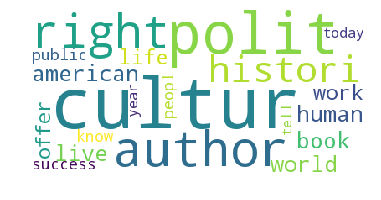

In [44]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk


category_list=list(df['Category'].unique())
for i in category_list:
    tf=df[df['Category']==i]
    topic_categories(tf,i)

## LSI

In [45]:
from gensim import corpora
from gensim.models import LsiModel
from gensim.parsing.preprocessing import STOPWORDS
import pprint
from nltk import sent_tokenize,word_tokenize 
import re

for i in range(len(rating_description)):
    doc = rating_description[i]
    doc_sent = sent_tokenize(doc)
    for j in range(len(doc_sent)):
        sent = doc_sent[j]
        sent = sent.strip().replace('\n','')
        sent = re.sub('[\[0-9+\]]','',sent)
        doc_sent[j] = sent
    rating_description[i] = '. '.join(doc_sent)


texts = [[word for word in doc.lower().split()
        if word not in STOPWORDS and word.isalnum()]
        for doc in rating_description]

dictionary=corpora.Dictionary(texts)
corpus=[dictionary.doc2bow(text) for text in texts]
    
#output
lsi = LsiModel(corpus, id2word=dictionary, num_topics=5)

## Control Loop for checking the incoming Rating Type

In [46]:
#test sample
new_list=["Gibson, the bestselling author of the cyberpunk classic Neuromancer (which has already been optioned for film), is known for thoughtful examinations of near-future technology and its impact on society. The Peripheral takes place in both the near-future and several decades further on, after several catastrophes have killed off most of the world's population. In the near future, down-and-out Flynne Fisher finds a job beta-testing a drug that connects her to a virtual reality world where she witnesses the death of one of the characters. The trouble is, she's not in virtual reality at all. She experiencing one of London's possible futures where the elite survivors of that post-apocalyptic age can interact with people from the past via their peripheral avatars and manipulate the past to their liking. It's no wonder that The Peripheral has been optioned for a television series; this is an interesting take on time travel spun as a mystery thriller, and it also sets the groundwork for what could be multiple story lines. The project is being produced by Kilter Films in association with Warner Bros. Television and Amazon Studios, to be televised as an Amazon series. The series will be written by Scott B. Smith who will also serve as executive producer along with Westworld creators Jonathan Nolan and Lisa Joy.",
         "Hurwitz's Spy-Fi thriller is what you might get if you mashed together The Equalizer with the X-Files. A secret, off-the-books government program to train orphans to be elite assassins forms the basis for this fast-paced story. Evan Smoak was once Orphan X before he broke up the program and escaped into hiding using his new skills. He's since become a legend, using his abilities—and an impressive arsenal of technology—for good, helping deserving victims get justice. But the people who ran the Orphan program are not so easily left behind. They're still looking for Evan and they have an army of equally-trained assassins to find him. You can join the adventure when Justin Lin's Perfect Storm Entertainment adapts he book into a television series with Hurwitz himself working as a co-screenwriter."]

In [49]:
from gensim.similarities.docsim import Similarity
from gensim import corpora, models, similarities

table_data = list()
for dat in new_list:
    
    #Your similarity code here. Use the in-class notebook as a reference
    vec_bow=dictionary.doc2bow(dat.lower().split())
    vec_lsi=lsi[vec_bow]
    index=similarities.MatrixSimilarity(lsi[corpus])
    sims=index[vec_lsi]
    sims = sorted(enumerate(sims), key=lambda item: -item[1])
    most_similar_rating = sims[0][0]
    table_data.append((rating_list[most_similar_rating],rating_description[most_similar_rating]))
    
#Write code to print table_data after the for loop ends
# table_data

for i in range(len(table_data)):
    print(table_data[i][0])

2
2


/Users/LovelyCheuk/anaconda/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning:

Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.



## LDA Model

In [50]:
import nltk
nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.parsing.preprocessing import STOPWORDS
import pprint
import gensim
from gensim.utils import simple_preprocess
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import pandas as pd
import numpy as np
!pip install gensim

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/LovelyCheuk/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [51]:
stemmer = SnowballStemmer('english')
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [52]:
Description_list = []
for text in df['Description']:
    stemedText = preprocess(text)
    Description_list.append(stemedText) 

In [53]:
dictionary = corpora.Dictionary(Description_list)
corpus = [dictionary.doc2bow(text) for text in Description_list]

In [54]:
num_topics = 3
passes = 10
lda = LdaModel(corpus,
              id2word=dictionary,
              num_topics=num_topics,
              passes=passes)

## LDA Visualization

In [55]:
from operator import itemgetter
lda.get_document_topics(corpus[0],minimum_probability=0.05,per_word_topics=False)
sorted(lda.get_document_topics(corpus[5],minimum_probability=0,per_word_topics=False),key=itemgetter(1),reverse=True)

[(0, 0.99267846), (1, 0.00377687), (2, 0.0035446996)]

In [56]:
import pyLDAvis.gensim
lda_display = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

/Users/LovelyCheuk/anaconda/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.


